In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split,GridSearchCV

import numpy as np

from sklearn.model_selection import TimeSeriesSplit

from prophet import Prophet

In [2]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, mape

In [3]:
def train_val_test_split(serie,tr_size=0.90,ts_size=0.1):

     N = serie.shape[0]

     Ntrain = int(tr_size*N) # Número de datos de entrenamiento

     Ntest = int(ts_size *N) # Número de datos de validación


     # Partición

     train = serie[0:Ntrain]
     test = serie[Ntrain:]

     return train,test

# Facebook Prophet

## Con AUM

In [4]:
df = pd.read_csv('BD preprocesada II.csv',sep=',')

# Formatear columna Fecha como datetime

df['Fecha'] = pd.to_datetime(df['Fecha'])

# df = df[['Fecha','AUM FIC']]

df = df.rename(columns={'Fecha':'ds','AUM FIC':'y'})

df.tail()

,ds,y,Efectivo,Reserva Bancaria,Del sector privado,Del sector público,Cuentas de ahorro,CDT 1/,Otros depósitos a la vista,Inflación anual %,...,Tasa A 120 días,Tasa Entre 121 y 179 días,Tasa A 180 días,Tasa Entre 181 y 359 días,Tasa A 360 días,Tasa Superiores a 360 días,Tasa Captaciones a través de CDT por red de oficinas,Tasa Captaciones a través de CDT por tesorería,Valor hoy,VALOR
2428,2024-08-03,8.276074e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2429,2024-08-04,8.277857e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2430,2024-08-05,8.297109e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2431,2024-08-06,8.339252e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2432,2024-08-07,8.335225e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05


In [5]:
tr,ts = train_val_test_split(df)

print(f'Tamaño set de entrenamiento: {tr.shape}')

print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (2189, 29)
Tamaño set de prueba: (244, 29)


In [6]:
model = Prophet()

# model.add_seasonality(name='daily', period=1, fourier_order=5)

model.add_seasonality(name='weekly', period=7, fourier_order=15)

model.add_seasonality(name='monthly', period=30, fourier_order=15)

model.add_seasonality(name='yearly', period=365.25, fourier_order=2)

# model.add_country_holidays(country_name='CO') 

model.fit(tr)



19:44:36 - cmdstanpy - INFO - Chain [1] start processing
19:44:37 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
forecast = model.predict(ts)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-12-08,7.189805e+07,6.689408e+07,7.296606e+07,7.189805e+07,7.189805e+07,-1.808004e+06,-1.808004e+06,-1.808004e+06,75760.393894,...,-195541.884927,-195541.884927,-195541.884927,-1.688222e+06,-1.688222e+06,-1.688222e+06,0.0,0.0,0.0,7.009004e+07
1,2023-12-09,7.193630e+07,6.714006e+07,7.327765e+07,7.193630e+07,7.193630e+07,-1.749308e+06,-1.749308e+06,-1.749308e+06,105523.049282,...,-220719.469704,-220719.469704,-220719.469704,-1.634112e+06,-1.634112e+06,-1.634112e+06,0.0,0.0,0.0,7.018699e+07
2,2023-12-10,7.197456e+07,6.728617e+07,7.345409e+07,7.197456e+07,7.197456e+07,-1.703902e+06,-1.703902e+06,-1.703902e+06,103736.318324,...,-229315.310633,-229315.310633,-229315.310633,-1.578323e+06,-1.578323e+06,-1.578323e+06,0.0,0.0,0.0,7.027065e+07
3,2023-12-11,7.201281e+07,6.747240e+07,7.356757e+07,7.201281e+07,7.201281e+07,-1.602570e+06,-1.602570e+06,-1.602570e+06,107323.951636,...,-189000.173376,-189000.173376,-189000.173376,-1.520894e+06,-1.520894e+06,-1.520894e+06,0.0,0.0,0.0,7.041024e+07
4,2023-12-12,7.205107e+07,6.768737e+07,7.363355e+07,7.205107e+07,7.205107e+07,-1.403425e+06,-1.403425e+06,-1.403425e+06,193821.679384,...,-135383.860102,-135383.860102,-135383.860102,-1.461862e+06,-1.461862e+06,-1.461862e+06,0.0,0.0,0.0,7.064764e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2024-08-03,8.104081e+07,6.570216e+07,9.513465e+07,6.639435e+07,9.578930e+07,-4.448136e+05,-4.448136e+05,-4.448136e+05,46561.277994,...,-220719.469704,-220719.469704,-220719.469704,-2.706554e+05,-2.706554e+05,-2.706554e+05,0.0,0.0,0.0,8.059600e+07
240,2024-08-04,8.107907e+07,6.609161e+07,9.656178e+07,6.632104e+07,9.592905e+07,-4.109932e+05,-4.109932e+05,-4.109932e+05,75760.393894,...,-229315.310633,-229315.310633,-229315.310633,-2.574382e+05,-2.574382e+05,-2.574382e+05,0.0,0.0,0.0,8.066808e+07
241,2024-08-05,8.111732e+07,6.592020e+07,9.647298e+07,6.625022e+07,9.606704e+07,-3.286073e+05,-3.286073e+05,-3.286073e+05,105523.049282,...,-189000.173376,-189000.173376,-189000.173376,-2.451301e+05,-2.451301e+05,-2.451301e+05,0.0,0.0,0.0,8.078872e+07
242,2024-08-06,8.115558e+07,6.647933e+07,9.694389e+07,6.606644e+07,9.621063e+07,-2.654127e+05,-2.654127e+05,-2.654127e+05,103736.318324,...,-135383.860102,-135383.860102,-135383.860102,-2.337652e+05,-2.337652e+05,-2.337652e+05,0.0,0.0,0.0,8.089016e+07


C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


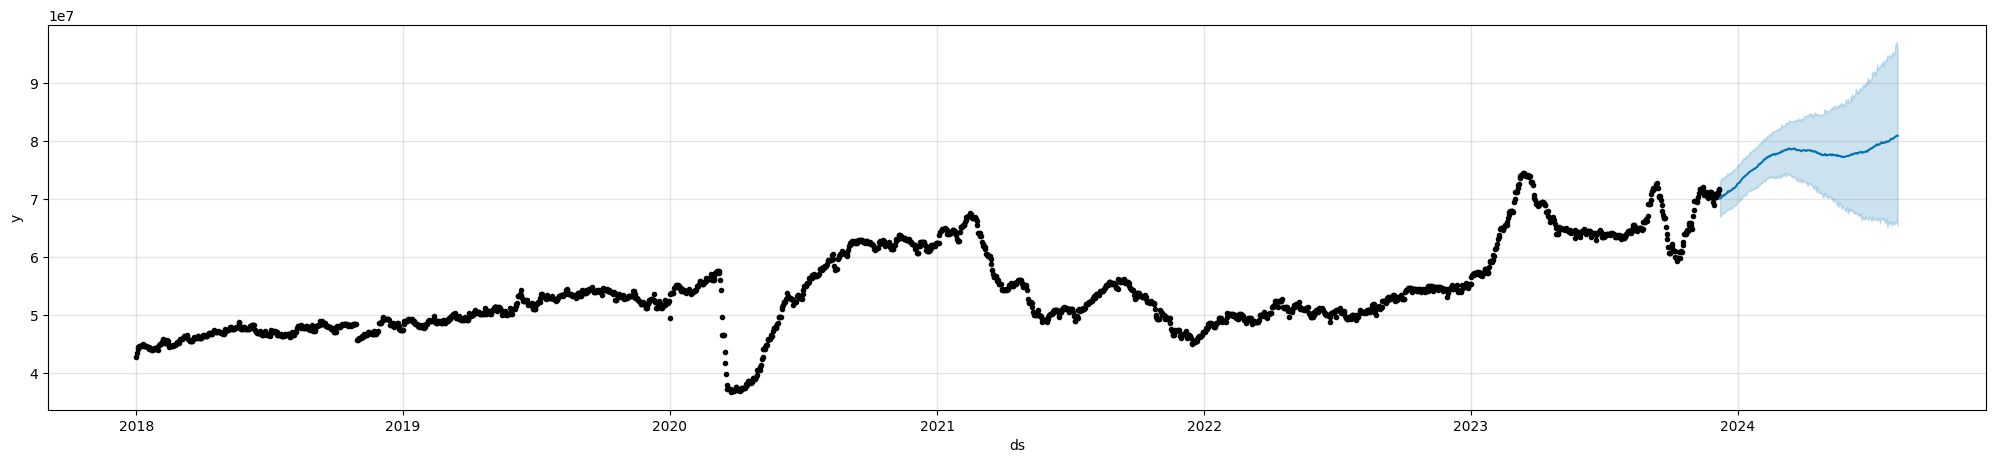

In [8]:
fig, ax = plt.subplots(figsize = (25,5))

fig = model.plot(forecast,ax=ax)

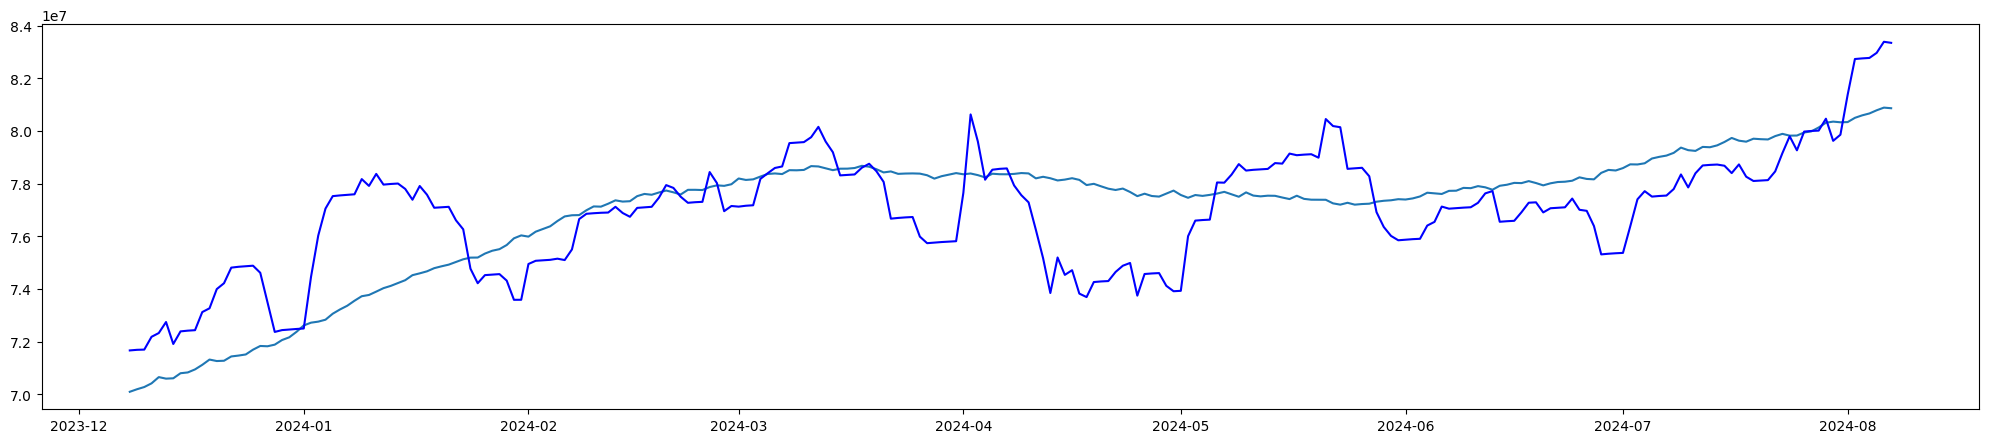

In [9]:
f, ax = plt.subplots(figsize = (25,5))

plt.plot(forecast['ds'],forecast['yhat'])

plt.plot(ts['ds'],ts['y'],color = 'b')

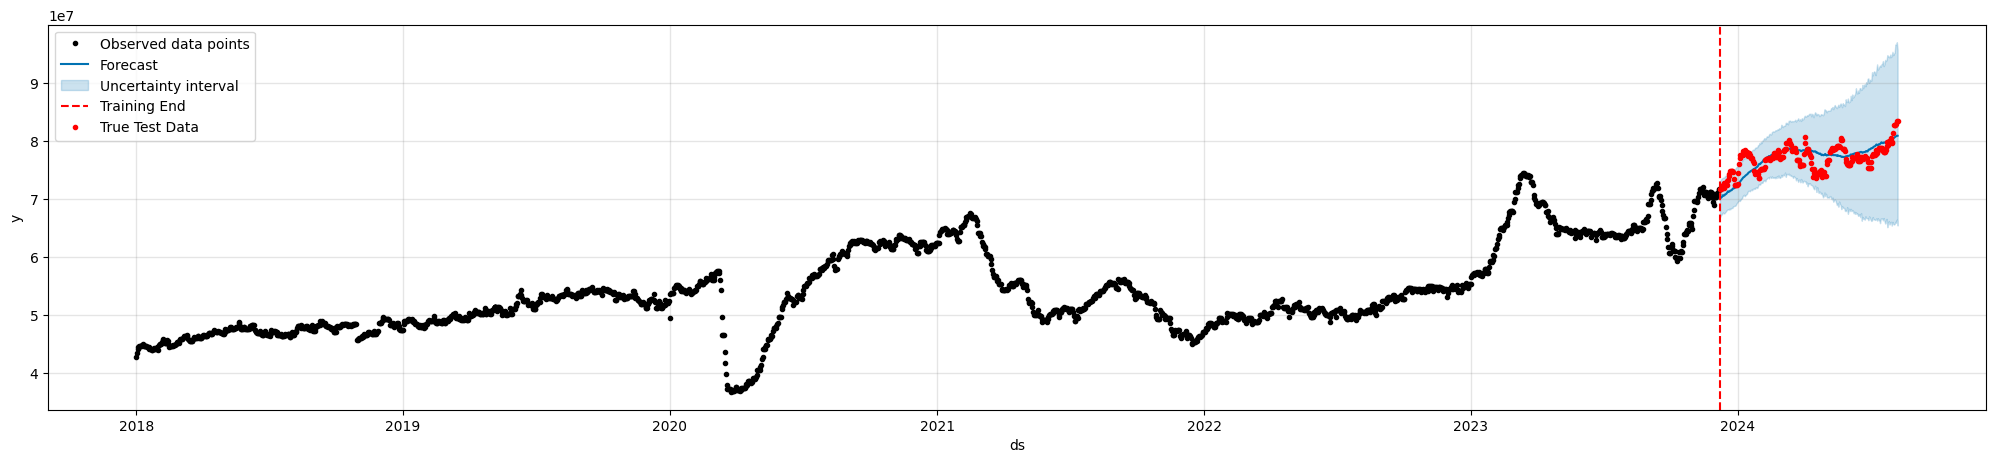

In [10]:
fig = plt.figure(figsize=(25, 5))

# plot the time series 
forecast_plot = model.plot(forecast,ax=plt.gca())

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast['ds'].iloc[-244]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
# df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])
plt.plot(ts['ds'], ts['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

# Show the plot
plt.show()

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a

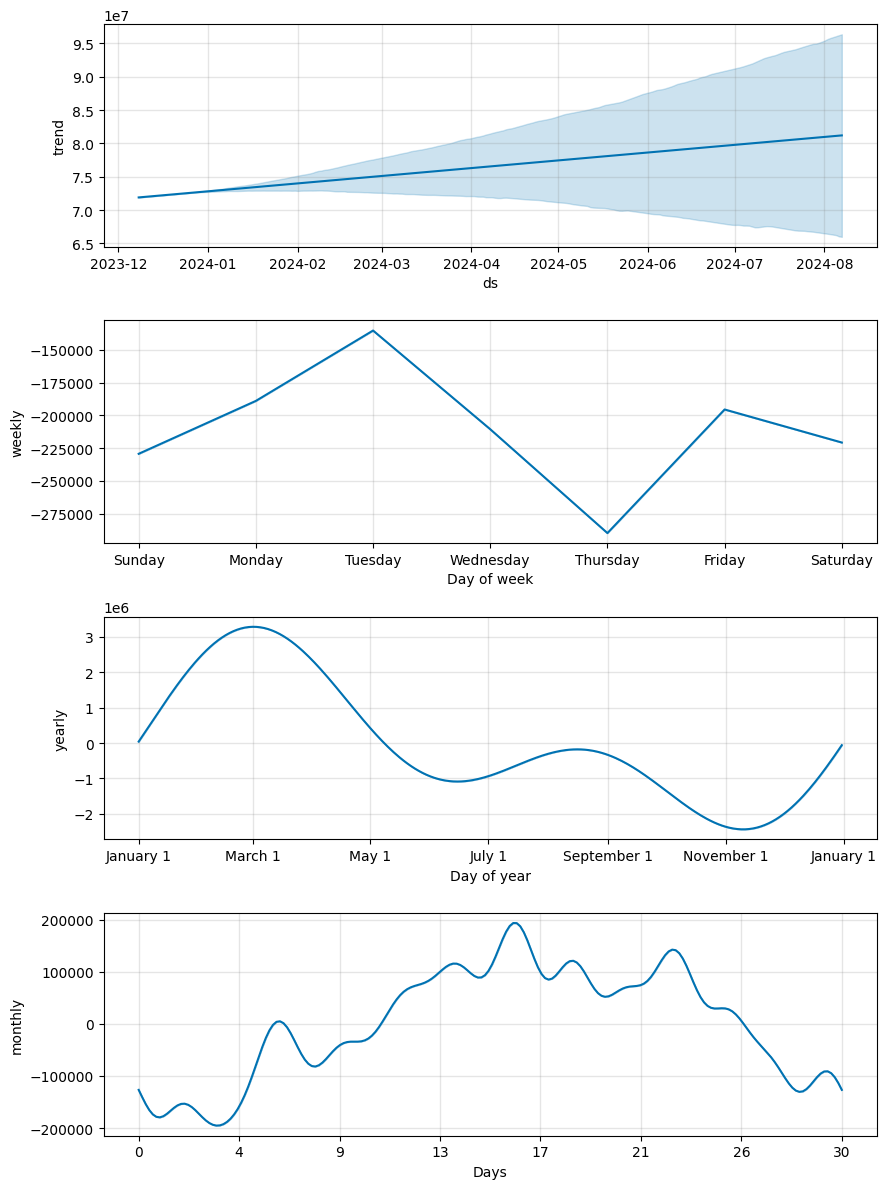

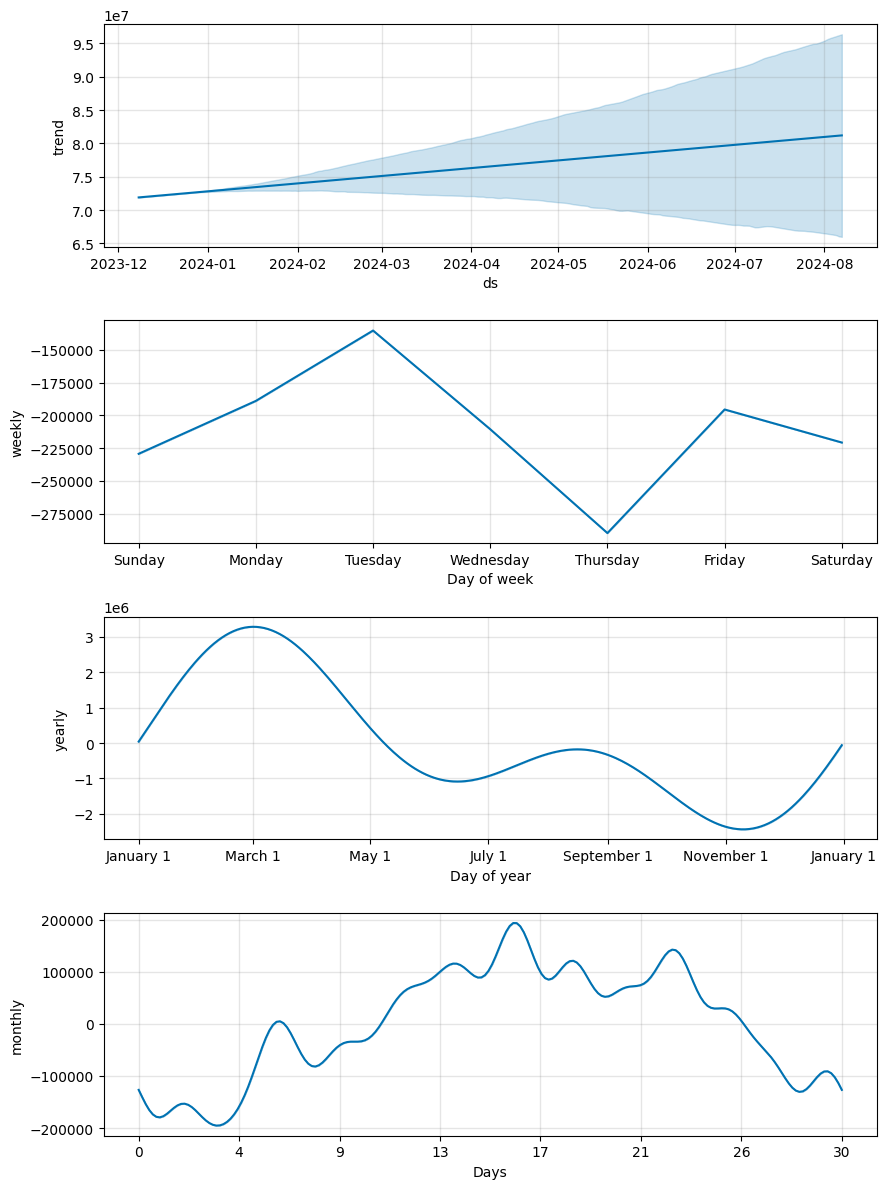

In [11]:
model.plot_components(forecast)

In [12]:
metricas_XProphet= calculate_metrics(ts['y'],forecast['yhat'])

# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['Prophet'],
    'MSE': [metricas_XProphet[0]],
    'RMSE': [metricas_XProphet[1]],
    'MAE': [metricas_XProphet[2]],
    'MAPE': [metricas_XProphet[3]]
})

resultados

,Model,MSE,RMSE,MAE,MAPE
0,Prophet,3.818209e+12,1.954024e+06,1.565089e+06,NaN


# Prophet Multivariado

In [13]:
df_new = pd.read_csv('BD preprocesada II.csv',sep=',')

# # Formatear columna Fecha como datetime

df_new['Fecha'] = pd.to_datetime(df_new['Fecha'])

df_new = df_new.rename(columns={'Fecha':'ds','AUM FIC':'y'})

df_new.tail()

,ds,y,Efectivo,Reserva Bancaria,Del sector privado,Del sector público,Cuentas de ahorro,CDT 1/,Otros depósitos a la vista,Inflación anual %,...,Tasa A 120 días,Tasa Entre 121 y 179 días,Tasa A 180 días,Tasa Entre 181 y 359 días,Tasa A 360 días,Tasa Superiores a 360 días,Tasa Captaciones a través de CDT por red de oficinas,Tasa Captaciones a través de CDT por tesorería,Valor hoy,VALOR
2428,2024-08-03,8.276074e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2429,2024-08-04,8.277857e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2430,2024-08-05,8.297109e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2431,2024-08-06,8.339252e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05
2432,2024-08-07,8.335225e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.80099,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.10044,0.107696,343.99,4022.05


In [14]:
df.columns

Index(['ds', 'y', 'Efectivo', 'Reserva Bancaria', 'Del sector privado',
       'Del sector público', 'Cuentas de ahorro', 'CDT 1/',
       'Otros depósitos a la vista', 'Inflación anual %',
       'Tasa de intervención de política monetaria (%)', 'Tasa 30 días',
       'Tasa Entre 31 y 44 días', 'Tasa A 45 días', 'Tasa Entre 46 y 59 días',
       'Tasa A 60 días', 'Tasa Entre 61 y 89 días', 'Tasa A 90 días',
       'Tasa Entre 91 y 119 días', 'Tasa A 120 días',
       'Tasa Entre 121 y 179 días', 'Tasa A 180 días',
       'Tasa Entre 181 y 359 días', 'Tasa A 360 días',
       'Tasa Superiores a 360 días',
       'Tasa Captaciones a través de CDT por red de oficinas',
       'Tasa Captaciones a través de CDT por tesorería', 'Valor hoy', 'VALOR'],
      dtype='object')

In [15]:
model_2 = Prophet()

# model_2.add_regressor('Tasa de intervención de política monetaria (%)')

# model_2.add_regressor('Tasa 30 días')

# model_2.add_regressor('Tasa Entre 46 y 59 días')

# model_2.add_regressor('Tasa Entre 31 y 44 días')

# model_2.add_regressor('Tasa A 45 días')

# model_2.add_regressor('Tasa Entre 61 y 89 días')

model_2.add_regressor('Valor hoy')

model_2.add_seasonality(name='yearly', period=365.25, fourier_order=2)

model_2.add_seasonality(name='weekly', period=7, fourier_order=15)

model_2.add_seasonality(name='monthly', period=7, fourier_order=15)

model_2.fit(tr)

19:44:39 - cmdstanpy - INFO - Chain [1] start processing
19:44:40 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast_Data= model_2.predict(ts)

forecast_Data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Valor hoy,Valor hoy_lower,Valor hoy_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-12-08,7.012414e+07,6.691511e+07,7.360163e+07,7.012414e+07,7.012414e+07,1.614273e+06,1.614273e+06,1.614273e+06,1.591131e+05,...,-114323.077498,-114323.077498,-114323.077498,-1.226514e+06,-1.226514e+06,-1.226514e+06,0.0,0.0,0.0,7.028325e+07
1,2023-12-09,7.015396e+07,6.699556e+07,7.378127e+07,7.015396e+07,7.015396e+07,1.614273e+06,1.614273e+06,1.614273e+06,1.491616e+05,...,-143137.073595,-143137.073595,-143137.073595,-1.178838e+06,-1.178838e+06,-1.178838e+06,0.0,0.0,0.0,7.030312e+07
2,2023-12-10,7.018379e+07,6.691054e+07,7.368859e+07,7.018379e+07,7.018379e+07,1.614273e+06,1.614273e+06,1.614273e+06,1.907226e+05,...,-146985.289344,-146985.289344,-146985.289344,-1.129580e+06,-1.129580e+06,-1.129580e+06,0.0,0.0,0.0,7.037451e+07
3,2023-12-11,7.021361e+07,6.716368e+07,7.377394e+07,7.021361e+07,7.021361e+07,1.614273e+06,1.614273e+06,1.614273e+06,2.815291e+05,...,-126983.994483,-126983.994483,-126983.994483,-1.078776e+06,-1.078776e+06,-1.078776e+06,0.0,0.0,0.0,7.049514e+07
4,2023-12-12,7.024344e+07,6.731277e+07,7.379255e+07,7.024344e+07,7.024344e+07,1.592363e+06,1.592363e+06,1.592363e+06,4.152760e+05,...,-75312.593745,-75312.593745,-75312.593745,-1.026462e+06,-1.026462e+06,-1.026462e+06,0.0,0.0,0.0,7.065871e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2024-08-03,7.725208e+07,6.841920e+07,8.920083e+07,6.674319e+07,8.649640e+07,2.694123e+06,2.694123e+06,2.694123e+06,2.054542e+06,...,-143137.073595,-143137.073595,-143137.073595,-3.533072e+05,-3.533072e+05,-3.533072e+05,0.0,0.0,0.0,7.930662e+07
240,2024-08-04,7.728191e+07,6.805857e+07,8.877262e+07,6.670252e+07,8.657178e+07,2.694123e+06,2.694123e+06,2.694123e+06,2.071776e+06,...,-146985.289344,-146985.289344,-146985.289344,-3.283767e+05,-3.283767e+05,-3.283767e+05,0.0,0.0,0.0,7.935368e+07
241,2024-08-05,7.731173e+07,6.811086e+07,8.979138e+07,6.665422e+07,8.664716e+07,2.694123e+06,2.694123e+06,2.694123e+06,2.135844e+06,...,-126983.994483,-126983.994483,-126983.994483,-3.043106e+05,-3.043106e+05,-3.043106e+05,0.0,0.0,0.0,7.944757e+07
242,2024-08-06,7.734155e+07,6.852549e+07,8.987485e+07,6.659432e+07,8.673151e+07,2.694123e+06,2.694123e+06,2.694123e+06,2.262350e+06,...,-75312.593745,-75312.593745,-75312.593745,-2.811479e+05,-2.811479e+05,-2.811479e+05,0.0,0.0,0.0,7.960390e+07


C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


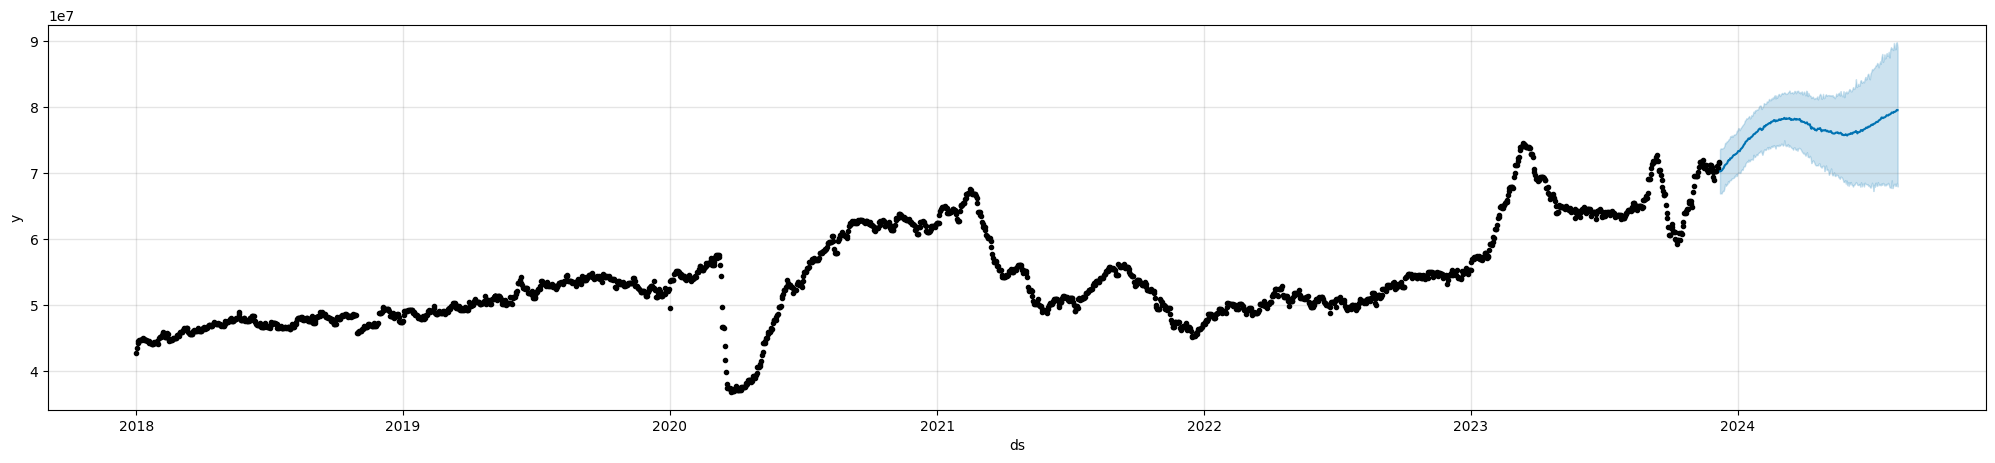

In [17]:
fig, ax = plt.subplots(figsize = (25,5))

fig = model_2.plot(forecast_Data,ax=ax)

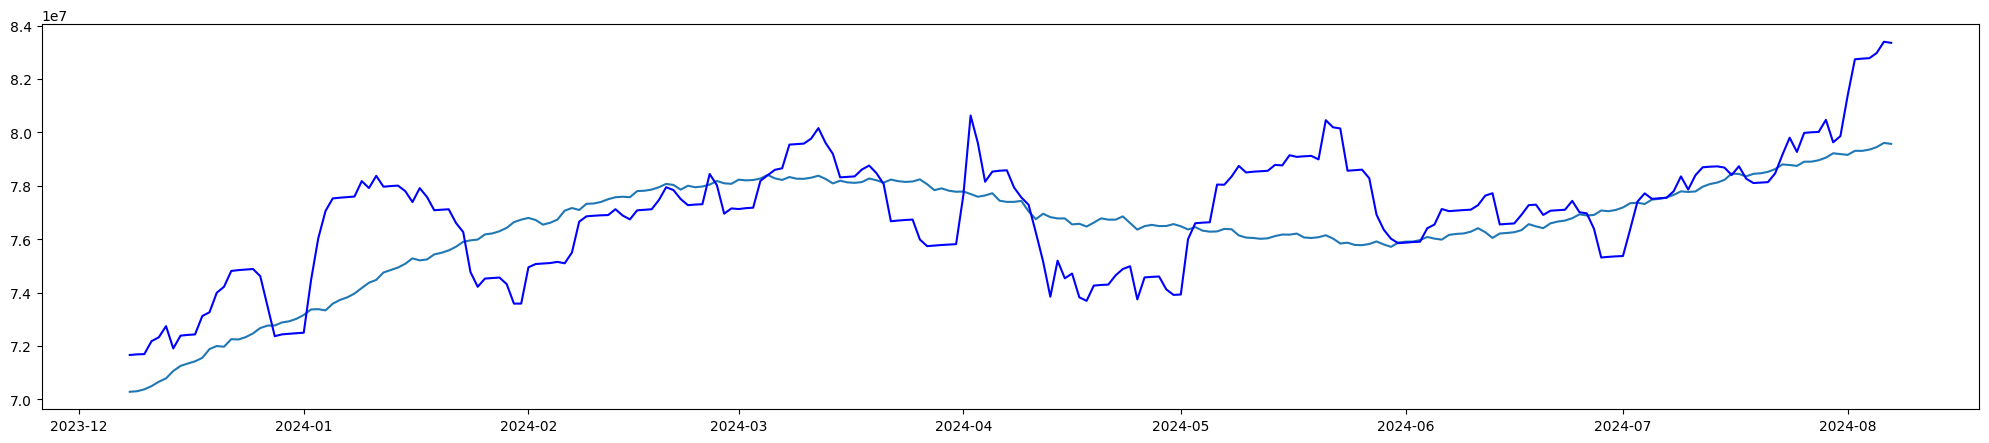

In [18]:
f, ax = plt.subplots(figsize = (25,5))

plt.plot(forecast_Data['ds'],forecast_Data['yhat'])

plt.plot(ts['ds'],ts['y'],color = 'b')

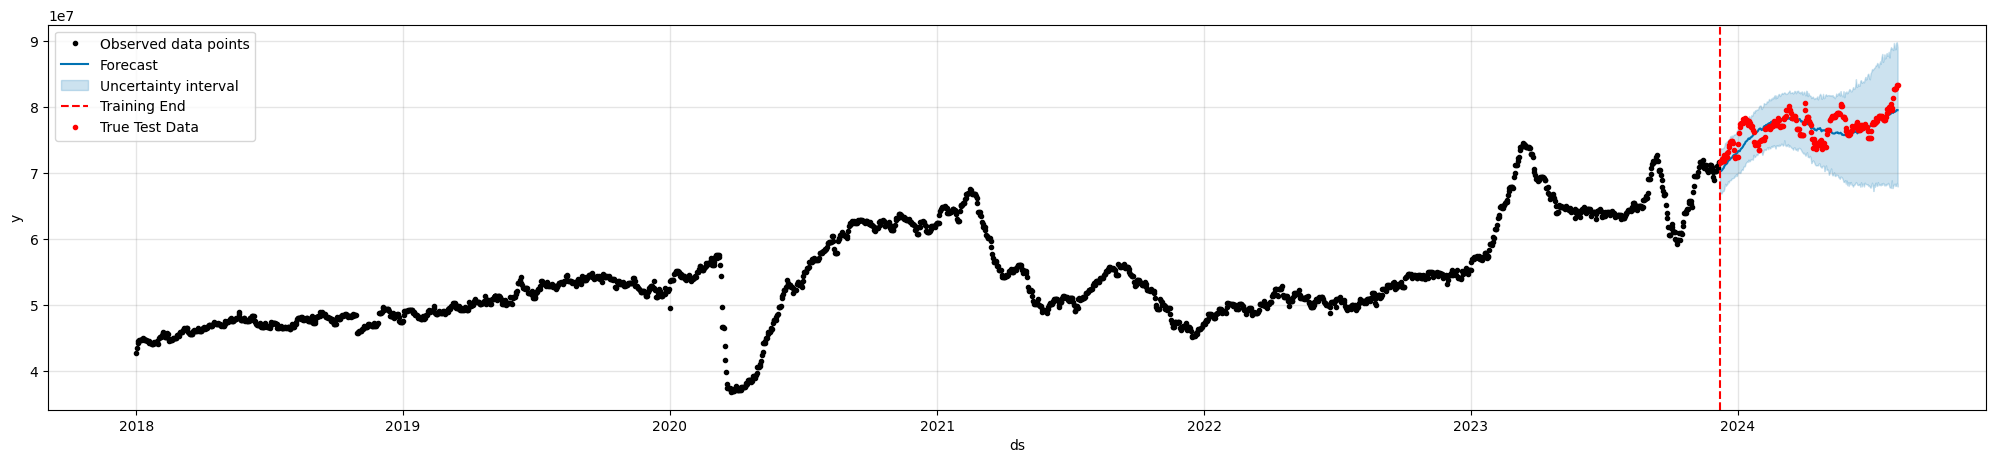

In [19]:
fig = plt.figure(figsize=(25, 5))

# plot the time series 
forecast_plot = model.plot(forecast_Data,ax=plt.gca())

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_Data['ds'].iloc[-244]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
# df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])
plt.plot(ts['ds'], ts['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()

# Show the plot
plt.show()

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a

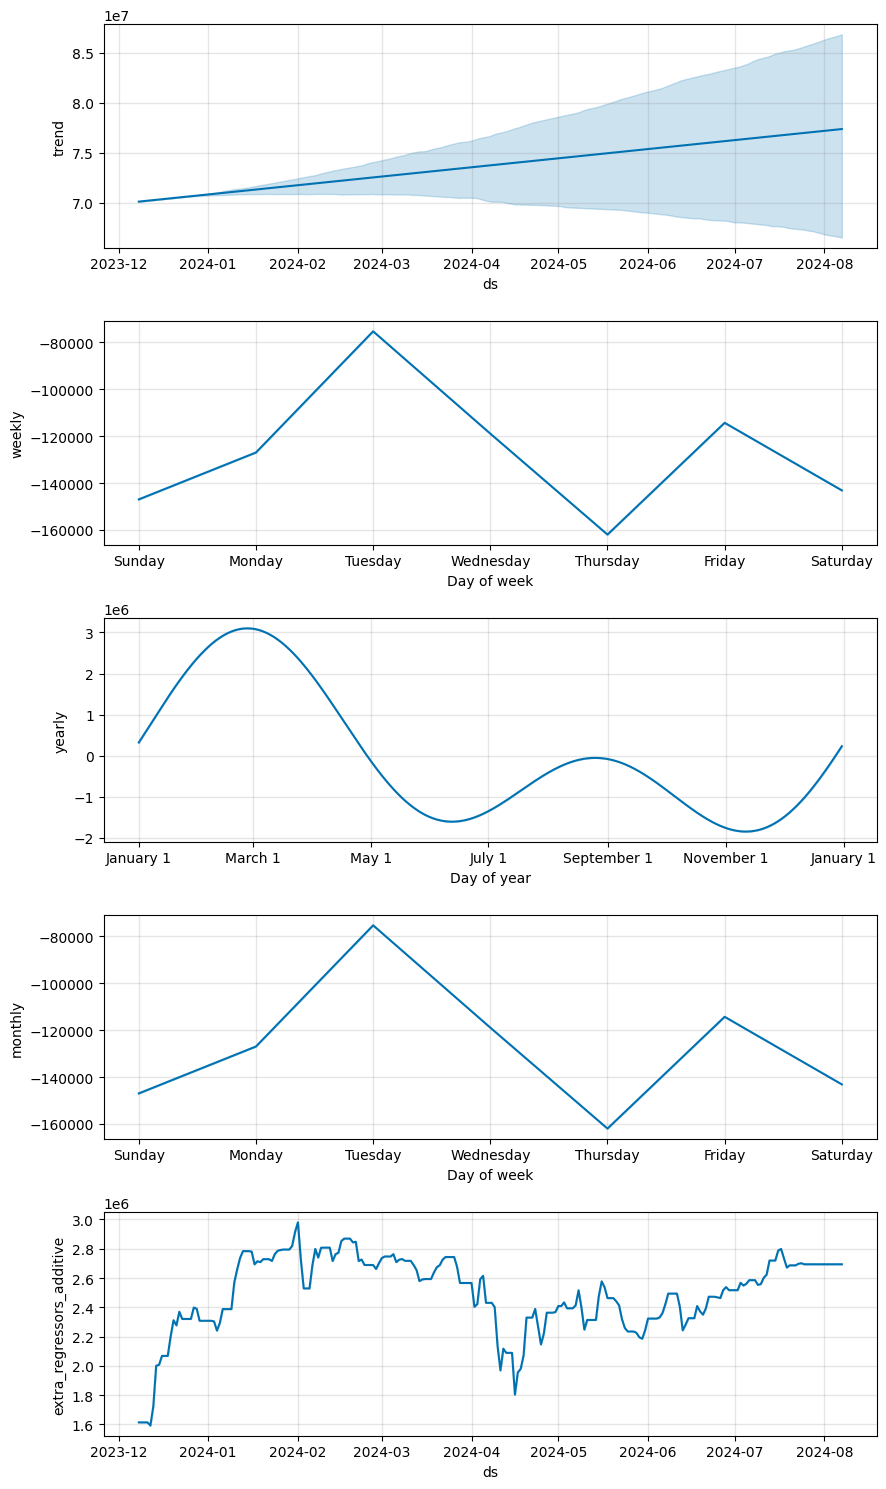

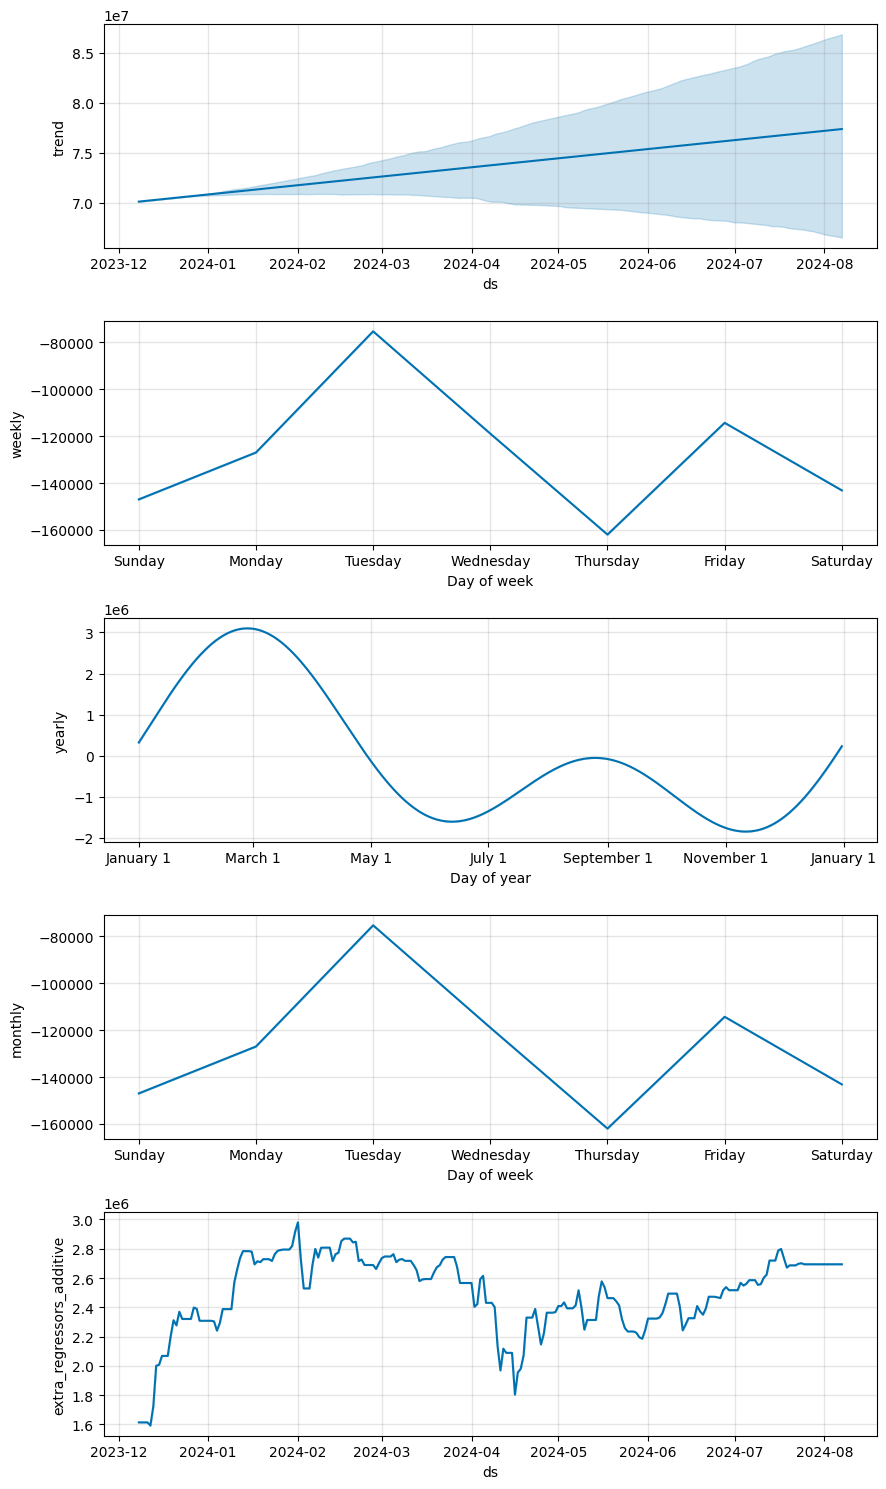

In [20]:
model_2.plot_components(forecast_Data)

In [23]:
metricas_XProphet_Multivariado= calculate_metrics(ts['y'],forecast_Data['yhat'])

# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['Prophet','Prophet Multivariado'],
    'MSE': [metricas_XProphet[0],metricas_XProphet_Multivariado[0]],
    'RMSE': [metricas_XProphet[1],metricas_XProphet_Multivariado[1]],
    'MAE': [metricas_XProphet[2],metricas_XProphet_Multivariado[2]],
})

resultados

,Model,MSE,RMSE,MAE
0,Prophet,3.818209e+12,1.954024e+06,1.565089e+06
1,Prophet Multivariado,3.248853e+12,1.802458e+06,1.436689e+06
